<a href="https://colab.research.google.com/github/etwalsaado/Practice/blob/main/data_cleaning_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("Pandas:", pd.__version__)

Pandas: 2.2.2


In [2]:
import os
if not os.path.exists('cleaned.csv'):
   dates = pd.date_range(start='2020-01-01', periods=60, freq='D')
   consumption = 50 + 5*np.pi*dates.dayofyear/365 + np.random.normal(0, 2, len(dates))
   temp = 20 + 3*np.pi*dates.dayofyear/365 + np.random.normal(0, 1, len(dates))
   df = pd.DataFrame({
       'dates': dates,
       'consumption': consumption.round(2),
       'temp': temp.round(2)
   })
   df.loc[3, 'consumption'] = np.nan
   df.loc[8, 'temp'] = np.nan
   df = pd.concat([df, df.iloc[10:12]])
   df.to_csv('cleaned.csv', index=False)
   print('cleaned.csv created')
else:
  print('cleaned.csv already exists')



cleaned.csv created


In [3]:
df = pd.read_csv('cleaned.csv', parse_dates=['dates'])
display(df.head(12))
print(df.shape)
print(df.isnull().sum())
print(df.duplicated().sum())

,dates,consumption,temp
0,2020-01-01,49.53,20.21
1,2020-01-02,47.91,20.08
2,2020-01-03,54.01,20.63
3,2020-01-04,NaN,20.11
4,2020-01-05,52.37,19.56
5,2020-01-06,48.31,19.58
6,2020-01-07,49.51,19.24
7,2020-01-08,51.61,20.37
8,2020-01-09,50.82,NaN
9,2020-01-10,49.31,19.29


(62, 3)
dates          0
consumption    1
temp           1
dtype: int64
2


In [4]:
df_drop_any = df.dropna(axis=0, how='any').copy()
display("before:", len(df), "after", len(df_drop_any))
print(df_drop_any.head())

'before:'

62

'after'

60

       dates  consumption   temp
0 2020-01-01        49.53  20.21
1 2020-01-02        47.91  20.08
2 2020-01-03        54.01  20.63
4 2020-01-05        52.37  19.56
5 2020-01-06        48.31  19.58


In [5]:
df_filll0 = df.fillna(0)
df_fill_mean = df.copy()
df_fill_mean['consumption'] = df_fill_mean['consumption'].fillna(df_fill_mean['consumption'].mean())
df_ffill = df.fillna(method='ffill')
df_bfill = df.fillna(method='bfill')
display(df_filll0.head(), df_fill_mean.head(), df_ffill.head(), df_bfill.head())

/tmp/ipython-input-1221408831.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
/tmp/ipython-input-1221408831.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')


,dates,consumption,temp
0,2020-01-01,49.53,20.21
1,2020-01-02,47.91,20.08
2,2020-01-03,54.01,20.63
3,2020-01-04,0.00,20.11
4,2020-01-05,52.37,19.56


,dates,consumption,temp
0,2020-01-01,49.530000,20.21
1,2020-01-02,47.910000,20.08
2,2020-01-03,54.010000,20.63
3,2020-01-04,51.254754,20.11
4,2020-01-05,52.370000,19.56


,dates,consumption,temp
0,2020-01-01,49.53,20.21
1,2020-01-02,47.91,20.08
2,2020-01-03,54.01,20.63
3,2020-01-04,54.01,20.11
4,2020-01-05,52.37,19.56


,dates,consumption,temp
0,2020-01-01,49.53,20.21
1,2020-01-02,47.91,20.08
2,2020-01-03,54.01,20.63
3,2020-01-04,52.37,20.11
4,2020-01-05,52.37,19.56


In [6]:
print("orginal rows:", len(df))
df_no_dup = df.drop_duplicates()
print("after dropping duplicates:", len(df_no_dup))
df_no_dup_date = df.drop_duplicates(subset=['dates'], keep='first')
print("after dropping duplicates on dates:", len(df_no_dup_date))

orginal rows: 62
after dropping duplicates: 60
after dropping duplicates on dates: 60


In [7]:
df2 = df.copy()
df2.loc[0, 'consumption'] = '1,234.50'
def to_float(x):
  try:
    if isinstance(x, str):
      return float(x.replace(',', ''))
    return float(x)
  except:
    return np.nan
df2['consumption_num'] = df2['consumption'].apply(to_float)
display(df2[['consumption','consumption_num']].head())
print(df2.dtypes)

/tmp/ipython-input-2223526806.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1,234.50' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[0, 'consumption'] = '1,234.50'


,consumption,consumption_num
0,"1,234.50",1234.50
1,47.91,47.91
2,54.01,54.01
3,NaN,NaN
4,52.37,52.37


dates              datetime64[ns]
consumption                object
temp                      float64
consumption_num           float64
dtype: object


In [8]:
df = pd.read_csv('cleaned.csv', parse_dates=['dates'])
print(len(df))
print(df.isnull().sum())
print(df.duplicated().sum())

62
dates          0
consumption    1
temp           1
dtype: int64
2


In [9]:
df_clean = df.copy()
df_clean['dates'] = pd.to_datetime(df_clean['dates'], errors='coerce')
df_clean = df_clean.dropna(subset=['dates'])
df_clean = df_clean.drop_duplicates(subset=['dates'], keep='first')
df_clean['consumption'] = df_clean['consumption'].fillna(df_clean['consumption'].mean())
df_clean['temp'] = df_clean['temp'].fillna(method='ffill').fillna(method='bfill')
df_clean['consumption'] = pd.to_numeric(df_clean['consumption'], errors='coerce')
df_clean['temp'] = pd.to_numeric(df_clean['temp'], errors='coerce')
print(len(df_clean))
print(df_clean.isnull().sum())
display(df_clean.head())

60
dates          0
consumption    0
temp           0
dtype: int64


/tmp/ipython-input-2275364496.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean['temp'] = df_clean['temp'].fillna(method='ffill').fillna(method='bfill')


,dates,consumption,temp
0,2020-01-01,49.530000,20.21
1,2020-01-02,47.910000,20.08
2,2020-01-03,54.010000,20.63
3,2020-01-04,51.251525,20.11
4,2020-01-05,52.370000,19.56


In [10]:
df_clean.reset_index(drop=True).to_csv('cleaned_final.csv', index=False)
print("Saved cleaned_final.csv, rows:", len(df_clean))

Saved cleaned_final.csv, rows: 60


In [11]:
def clean_my_df(df):

    df['consumption'] = df['consumption'].apply(lambda x: np.nan if x < 0 else x)


    plt.figure(figsize=(10, 4))
    df['consumption'].hist(bins=20)
    plt.title("before")
    plt.xlabel("Consumption")
    plt.ylabel("Frequency")
    plt.show()


    median_value = df['consumption'].median()
    df['consumption'] = df['consumption'].fillna(median_value)

    plt.figure(figsize=(10, 4))
    df['consumption'].hist(bins=20)
    plt.title("after (median)")
    plt.xlabel("Consumption")
    plt.ylabel("Frequency")
    plt.show()

    if 'temp' in df.columns:
        df = df.drop(columns=['temp'])

    df_no_dup_date = df.drop_duplicates(subset=['dates'])
    removed_count = len(df) - len(df_no_dup_date)
    print(f"columns: {removed_count}")


    return df_no_dup_date


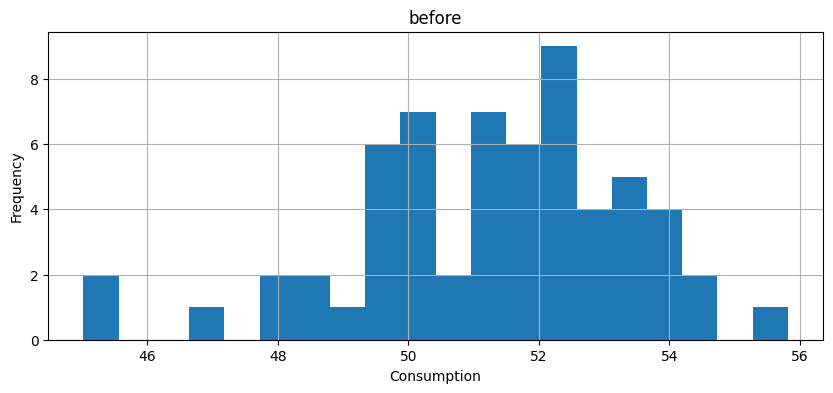

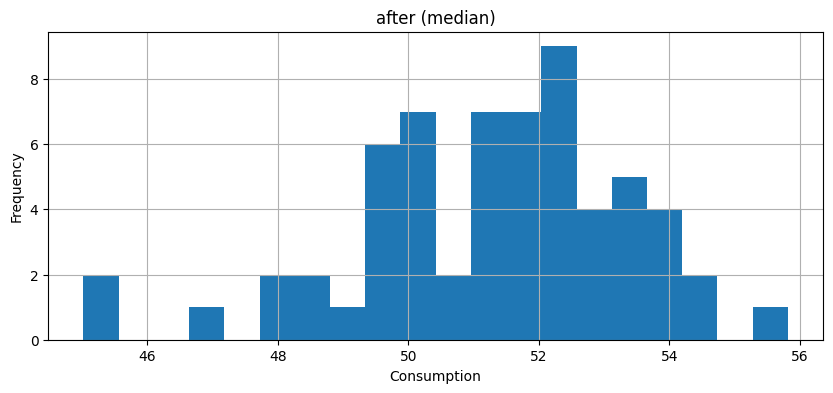

columns: 2


In [12]:
df = pd.read_csv("cleaned.csv", parse_dates=['dates'])
cleaned_df = clean_my_df(df)

In [13]:
df['month'] = df['dates'].dt.month
monthly_mean = df.groupby('month')['consumption'].mean()
display(monthly_mean)

,consumption
month,
1,50.906667
2,51.661379


In [14]:
df['dates'] = pd.to_datetime(df['dates'])
df.set_index('dates', inplace=True)
monthly_resample = df['consumption'].resample('M').mean()
display(monthly_resample.head())

/tmp/ipython-input-2947803044.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_resample = df['consumption'].resample('M').mean()


,consumption
dates,
2020-01-31,50.906667
2020-02-29,51.661379


In [15]:
bins = [0,45,55,999]
labels = ['low', 'medium', 'high']
df['cons_cat'] = pd.cut(df['consumption'], bins=bins, labels=labels)
display(df['cons_cat'].value_counts())

,count
cons_cat,
medium,61
high,1
low,0


In [16]:
agg_month = df.groupby(df.index.month).agg({'consumption': 'mean', 'temp': 'max'})
display(agg_month.head())

,consumption,temp
dates,,
1,50.906667,22.17
2,51.661379,23.36


In [19]:
df = pd.read_csv('cleaned_final.csv')
if 'dates' not in df.columns:
    raise KeyError ("not found")
df['dates'] = pd.to_datetime(df['dates'], errors='coerce')
df['month'] = df['dates'].dt.month
monthly_summary = df.groupby('month').agg(
    mean_cons=('consumption', 'mean'),
    sum_cons=('consumption', 'sum'),
    days_count=('consumption', 'count'),
).reset_index()
monthly_summary.to_csv('monthly_summary.csv', index=False)
print("saved result monthly_summary.csv")
display(monthly_summary)



saved result monthly_summary.csv


,month,mean_cons,sum_cons,days_count
0,1,50.868114,1576.911525,31
1,2,51.661379,1498.180000,29


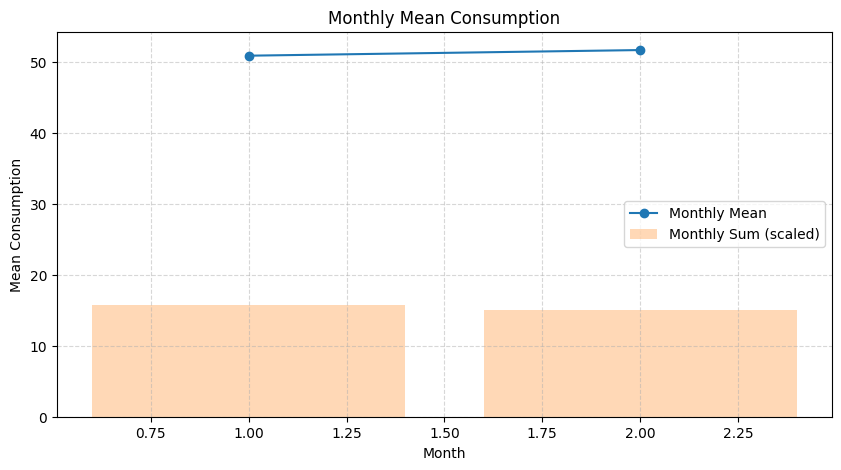

In [18]:
plt.figure(figsize=(10,5))
plt.plot(monthly_summary['month'],monthly_summary['mean_cons'], marker='o', linestyle='-', label='Monthly Mean', color='tab:blue')
plt.bar(monthly_summary['month'], monthly_summary['sum_cons']/100, alpha=0.3, label='Monthly Sum (scaled)', color='tab:orange')
plt.xlabel('Month')
plt.ylabel('Mean Consumption')
plt.legend()
plt.title('Monthly Mean Consumption')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()